In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


df=pd.read_csv('Train.csv')
df.head()

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,2,NaN,neutral
2,3,no politics danger now i can make a propaganda...,negative
3,4,i am the senate gets stabbed,neutral
4,5,is this a suicide,neutral


In [3]:
df1=pd.read_csv('Test.csv')


In [4]:
df=df.drop(['Id'],axis=1)
df1=df1.drop(['Id'],axis=1)

In [5]:
df.head()

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,NaN,neutral
2,no politics danger now i can make a propaganda...,negative
3,i am the senate gets stabbed,neutral
4,is this a suicide,neutral


In [6]:
df.isnull().sum()

,0
Body,228
Sentiment Type,0


In [7]:
df1.isnull().sum()

,0
Body,228


In [8]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [9]:
df.head()

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
2,no politics danger now i can make a propaganda...,negative
3,i am the senate gets stabbed,neutral
4,is this a suicide,neutral
5,removed,neutral


In [10]:
!pip install emoji nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    # Convert emojis to descriptive text
    text = emoji.demojize(text)

    # Convert to lowercase
    text = text.lower()

    # Expand contractions
    text = text.replace("n't"," not")
    text = text.replace("'m"," am")
    text = text.replace("'s"," is")
    text = text.replace("'re"," are")
    text = text.replace("'ll"," will")
    text = text.replace("'ve"," have")
    text = text.replace("'d"," would")
    text = text.replace("won't", "will not")
    text = text.replace("can't", "cannot")

    text = re.sub(r'http\S+|www\S+', '', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    # Normalize repeated characters
    text = re.sub(r'(.)\1+', r'\1\1', text)  # e.g., goooood -> good

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    text = re.sub(r'\s+', ' ', text).strip()

    return text


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
df=df.applymap(preprocessing)
df1=df1.applymap(preprocessing)


/tmp/ipython-input-2147596322.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(preprocessing)
/tmp/ipython-input-2147596322.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1=df1.applymap(preprocessing)


In [12]:
df.head()

,Body,Sentiment Type
0,rule mete polarizing political topic vulnerabl...,neutral
2,politics danger make propaganda meme telling p...,negative
3,senate get stabbed,neutral
4,suicide,neutral
5,removed,neutral


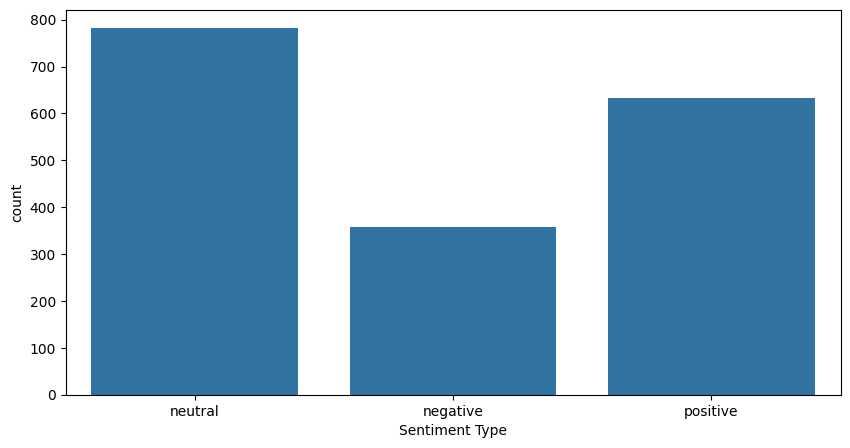

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment Type',data=df)
plt.show()

In [14]:
def balanced_sampling(df, stratify_col, n=None, random_state=None):
    # If n not given, pick the minimum class size
    if n is None:
        n = df[stratify_col].value_counts().min()

    return df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=n, random_state=random_state)
    ).reset_index(drop=True)

df2= balanced_sampling(df, 'Sentiment Type', random_state=42)

/tmp/ipython-input-2237020653.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(stratify_col, group_keys=False).apply(


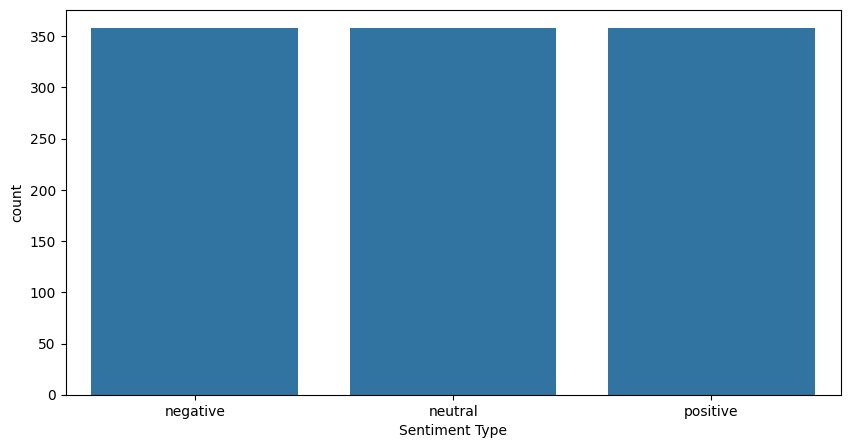

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment Type',data=df2)
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df2['Body'])
X_test_tfidf = tfidf_vectorizer.transform(df1['Body'])

In [17]:
X_train_tfidf.shape

(1074, 2739)

In [18]:
X_test_tfidf.shape

(1772, 2739)

In [19]:
df.shape

(1772, 2)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_train=df2['Sentiment Type']
y_train1=df['Sentiment Type']

model=LogisticRegression()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)

accuracy1=accuracy_score(y_pred,y_train1)
print(accuracy1)

0.8515801354401806


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y_train=df2['Sentiment Type']
y_train1=df['Sentiment Type']

model=KNeighborsClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)

accuracy2=accuracy_score(y_pred,y_train1)
print(accuracy2)

0.4554176072234763


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y_train=df2['Sentiment Type']
y_train1=df['Sentiment Type']

model=DecisionTreeClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)

accuracy3=accuracy_score(y_pred,y_train1)
print(accuracy3)

0.9006772009029346


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_train=df2['Sentiment Type']
y_train1=df['Sentiment Type']

model=SVC()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)

accuracy4=accuracy_score(y_pred,y_train1)
print(accuracy4)

0.8623024830699775


In [24]:
from sklearn.linear_model import Perceptron

y_train=df2['Sentiment Type']
y_train1=df['Sentiment Type']

model=Perceptron()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)

accuracy5=accuracy_score(y_pred,y_train1)
print(accuracy5)

0.8572234762979684


In [25]:
from sklearn.ensemble import RandomForestClassifier

y_train=df2['Sentiment Type']
y_train1=df['Sentiment Type']

model=RandomForestClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)

accuracy6=accuracy_score(y_pred,y_train1)
print(accuracy6)

0.912528216704289


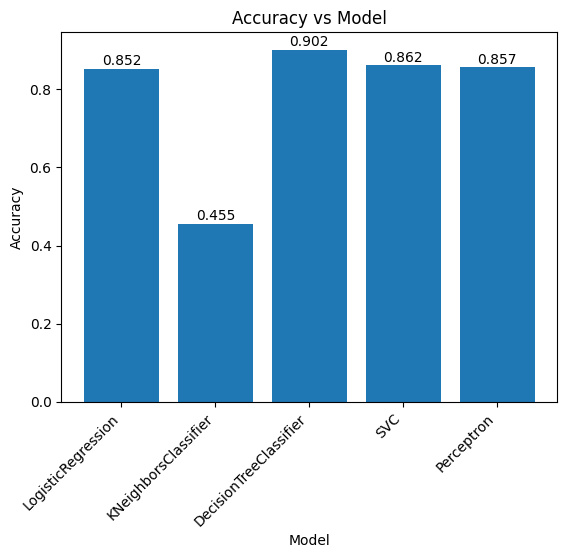

In [26]:
import matplotlib.pyplot as plt

models = ['LogisticRegression','KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC', 'Perceptron']
accuracies = [0.8515801354401806,0.4554176072234763,0.9018058690744921,0.8623024830699775,0.8572234762979684]

accuracies_rounded = [round(acc, 3) for acc in accuracies]

plt.bar(models, accuracies)

plt.title('Accuracy vs Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xticks(rotation=45, ha='right')

# Add text annotations for accuracy values
for i, v in enumerate(accuracies_rounded):
    plt.text(i, v + 0.01, str(v), ha='center', color='black')

plt.show()

In [ ]:
x1_test='I LOVE MY COUNTRY!'
x1_test=preprocessing(x1_test)
x1_test=tfidf_vectorizer.transform([x1_test])
y_train=df2['Sentiment Type']

model=DecisionTreeClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(x1_test)

print(y_pred)

['positive']


In [ ]:
x1_test='he is an evil'
x1_test=preprocessing(x1_test)
x1_test=tfidf_vectorizer.transform([x1_test])
y_train=df2['Sentiment Type']

model=DecisionTreeClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(x1_test)

print(y_pred)

['neutral']


In [ ]:
x1_test='will it rain tomorrow?'
x1_test=preprocessing(x1_test)
x1_test=tfidf_vectorizer.transform([x1_test])
y_train=df2['Sentiment Type']

model=DecisionTreeClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(x1_test)

print(y_pred)

['neutral']


In [ ]:
x1_test='LOVE IS EVIL'
x1_test=preprocessing(x1_test)
x1_test=tfidf_vectorizer.transform([x1_test])
y_train=df['Sentiment Type']

model=LogisticRegression()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(x1_test)

print(y_pred)

['positive']
